<a href="https://colab.research.google.com/github/johndoe775/Machine-Learning-Project-files/blob/main/olachurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv
To: /content/ola_driver_scaler.csv
100% 1.13M/1.13M [00:00<00:00, 1.24MB/s]


In [3]:
df=pd.read_csv("/content/ola_driver_scaler.csv")

In [4]:
df=df.iloc[:, 1:]

In [5]:
df

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


In [6]:
pd.to_datetime(df["LastWorkingDate"])

<ipython-input-6-04ca3252079d>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df["LastWorkingDate"])


,LastWorkingDate
0,NaT
1,NaT
2,2019-03-11
3,NaT
4,NaT
...,...
19099,NaT
19100,NaT
19101,NaT
19102,NaT


In [7]:
df["LastWorkingDate"].apply(lambda x: 1 if (x) else  0)

,LastWorkingDate
0,1
1,1
2,1
3,1
4,1
...,...
19099,1
19100,1
19101,1
19102,1


In [8]:
df["LastWorkingDate"]=df["LastWorkingDate"].fillna(0)

In [9]:
df=df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18991 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                18991 non-null  object 
 1   Driver_ID             18991 non-null  int64  
 2   Age                   18991 non-null  float64
 3   Gender                18991 non-null  float64
 4   City                  18991 non-null  object 
 5   Education_Level       18991 non-null  int64  
 6   Income                18991 non-null  int64  
 7   Dateofjoining         18991 non-null  object 
 8   LastWorkingDate       18991 non-null  object 
 9   Joining Designation   18991 non-null  int64  
 10  Grade                 18991 non-null  int64  
 11  Total Business Value  18991 non-null  int64  
 12  Quarterly Rating      18991 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 2.0+ MB


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18991 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                18991 non-null  object 
 1   Driver_ID             18991 non-null  int64  
 2   Age                   18991 non-null  float64
 3   Gender                18991 non-null  float64
 4   City                  18991 non-null  object 
 5   Education_Level       18991 non-null  int64  
 6   Income                18991 non-null  int64  
 7   Dateofjoining         18991 non-null  object 
 8   LastWorkingDate       18991 non-null  object 
 9   Joining Designation   18991 non-null  int64  
 10  Grade                 18991 non-null  int64  
 11  Total Business Value  18991 non-null  int64  
 12  Quarterly Rating      18991 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 2.0+ MB


In [12]:
df.dtypes.values

array([dtype('O'), dtype('int64'), dtype('float64'), dtype('float64'),
       dtype('O'), dtype('int64'), dtype('int64'), dtype('O'), dtype('O'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64')],
      dtype=object)

In [13]:
df["Grade"].value_counts()

,count
Grade,
2,6591
1,5153
3,4802
4,2141
5,304


In [14]:
df["Quarterly Rating"].value_counts()

,count
Quarterly Rating,
1,7620
2,5528
3,3873
4,1970


In [15]:
df["Education_Level"].value_counts()

,count
Education_Level,
1,6827
2,6292
0,5872


In [16]:
df.columns[df.dtypes.values==np.unique(df.dtypes.values)[2]]

Index(['MMM-YY', 'City', 'Dateofjoining', 'LastWorkingDate'], dtype='object')

In [17]:
np.unique(df.dtypes.values)[2]

dtype('O')

In [18]:
df["City"].value_counts()

,count
City,
C20,1000
C29,893
C26,865
C22,805
C27,778
C15,750
C10,741
C12,724
C8,709


In [19]:
df["Joining Designation"].value_counts()

,count
Joining Designation,
1,9760
2,5932
3,2829
4,341
5,129


In [20]:
pd.get_dummies(df["Grade"],dtype="int",prefix="grade")

,grade_1,grade_2,grade_3,grade_4,grade_5
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
19099,0,1,0,0,0
19100,0,1,0,0,0
19101,0,1,0,0,0
19102,0,1,0,0,0


In [21]:
pd.get_dummies(df["Joining Designation"],dtype="int",prefix="jd")

,jd_1,jd_2,jd_3,jd_4,jd_5
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
19099,0,1,0,0,0
19100,0,1,0,0,0
19101,0,1,0,0,0
19102,0,1,0,0,0


In [22]:
pd.get_dummies(df["Education_Level"],dtype="int",prefix="el")

,el_0,el_1,el_2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
19099,0,0,1
19100,0,0,1
19101,0,0,1
19102,0,0,1


In [23]:
pd.get_dummies(df["Gender"],dtype="int",prefix="gender")

,gender_0.0,gender_1.0
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
19099,1,0
19100,1,0
19101,1,0
19102,1,0


In [24]:
pd.get_dummies(df["Quarterly Rating"],dtype="int",prefix="rating")

,rating_1,rating_2,rating_3,rating_4
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
19099,0,0,1,0
19100,0,0,1,0
19101,0,1,0,0
19102,0,1,0,0


In [25]:
df1=pd.concat([pd.get_dummies(df["Quarterly Rating"],dtype="int",prefix="rating"),pd.get_dummies(df["Gender"],dtype="int",prefix="gender"),pd.get_dummies(df["Education_Level"],dtype="int",prefix="el"),pd.get_dummies(df["Joining Designation"],dtype="int",prefix="jd"),pd.get_dummies(df["Grade"],dtype="int",prefix="grade")],axis=1)

In [26]:
df

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,0,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,0,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,0,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,0,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,0,2,2,740280,3
19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,0,2,2,448370,3
19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,0,2,2,0,2
19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,0,2,2,200420,2


In [27]:
df["left"]=df["LastWorkingDate"].fillna(0).apply(lambda x :0 if x==0 else 1)

<ipython-input-27-90bdcf9fa106>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["left"]=df["LastWorkingDate"].fillna(0).apply(lambda x :0 if x==0 else 1)


In [28]:
df

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,left
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,0,1,1,2381060,2,0
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,0,1,1,-665480,2,0
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2,1
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,0,2,2,0,1,0
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,0,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,0,2,2,740280,3,0
19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,0,2,2,448370,3,0
19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,0,2,2,0,2,0
19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,0,2,2,200420,2,0


In [29]:
df.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating', 'left'],
      dtype='object')

In [30]:
expdf=df[['MMM-YY', 'Dateofjoining', 'LastWorkingDate', 'left']]

In [31]:
def func(x):
  if x["left"]==0:
    return (pd.to_datetime(x["MMM-YY"],format="%d/%m/%y")-pd.to_datetime(x["Dateofjoining"],format="%d/%m/%y")).days
  else:
    return (pd.to_datetime(x["LastWorkingDate"],format="%d/%m/%y")-pd.to_datetime(x["Dateofjoining"],format="%d/%m/%y")).days


In [32]:
func(expdf.iloc[1])

9

In [33]:
df["exp"]=expdf.apply(func,axis=1)

<ipython-input-33-35f9159cd515>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["exp"]=expdf.apply(func,axis=1)


In [34]:
df

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,left,exp
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,0,1,1,2381060,2,0,8
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,0,1,1,-665480,2,0,9
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2,1,314
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,0,2,2,0,1,0,-152
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,0,2,2,0,1,0,-151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,0,2,2,740280,3,0,-211
19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,0,2,2,448370,3,0,-210
19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,0,2,2,0,2,0,-209
19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,0,2,2,200420,2,0,-208


In [35]:
df=df[df["exp"]>=0]

In [36]:
df.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating', 'left', 'exp'],
      dtype='object')

In [56]:
df2=df[['Age',
       'Income', 'Total Business Value', 'left', 'exp']]

In [41]:
df1

,rating_1,rating_2,rating_3,rating_4,gender_0.0,gender_1.0,el_0,el_1,el_2,jd_1,jd_2,jd_3,jd_4,jd_5,grade_1,grade_2,grade_3,grade_4,grade_5
0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0
1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0
2,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0
3,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0
4,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0
19100,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0
19101,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0
19102,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0


In [48]:
df1=df1[df1.index.isin(df.index)]

In [49]:
df

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,left,exp
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,0,1,1,2381060,2,0,8
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,0,1,1,-665480,2,0,9
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2,1,314
6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,0,2,2,0,1,0,173
7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,0,2,2,0,1,0,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19092,02/01/19,2787,28.0,1.0,C20,2,69498,21/07/18,0,1,1,250000,2,0,165
19093,03/01/19,2787,28.0,1.0,C20,2,69498,21/07/18,0,1,1,319740,2,0,166
19094,04/01/19,2787,28.0,1.0,C20,2,69498,21/07/18,0,1,1,0,1,0,167
19095,05/01/19,2787,28.0,1.0,C20,2,69498,21/07/18,0,1,1,0,1,0,168


In [38]:
from sklearn.preprocessing import TargetEncoder

In [39]:
label=TargetEncoder()

In [53]:
cityenc=label.fit_transform(df["City"].values.reshape(-1,1),y=df["left"])

In [54]:
len(cityenc)

13922

In [57]:
df2["city"]=cityenc

<ipython-input-57-8c793f7f8276>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["city"]=cityenc


In [58]:
df2

,Age,Income,Total Business Value,left,exp,city
0,28.0,57387,2381060,0,8,0.152180
1,28.0,57387,-665480,0,9,0.139369
2,28.0,57387,0,1,314,0.134417
6,43.0,65603,0,0,173,0.105264
7,43.0,65603,0,0,174,0.118242
...,...,...,...,...,...,...
19092,28.0,69498,250000,0,165,0.142526
19093,28.0,69498,319740,0,166,0.133274
19094,28.0,69498,0,0,167,0.150324
19095,28.0,69498,0,0,168,0.142526


In [59]:
df1

,rating_1,rating_2,rating_3,rating_4,gender_0.0,gender_1.0,el_0,el_1,el_2,jd_1,jd_2,jd_3,jd_4,jd_5,grade_1,grade_2,grade_3,grade_4,grade_5
0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0
1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0
2,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0
6,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0
7,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19092,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0
19093,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0
19094,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0
19095,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0


In [62]:
dff=pd.concat([df1,df2],axis=1)

In [63]:
dff.columns

Index(['rating_1', 'rating_2', 'rating_3', 'rating_4', 'gender_0.0',
       'gender_1.0', 'el_0', 'el_1', 'el_2', 'jd_1', 'jd_2', 'jd_3', 'jd_4',
       'jd_5', 'grade_1', 'grade_2', 'grade_3', 'grade_4', 'grade_5', 'Age',
       'Income', 'Total Business Value', 'left', 'exp', 'city'],
      dtype='object')

In [66]:
dff=dff[['rating_1', 'rating_2', 'rating_3', 'rating_4', 'gender_0.0',
       'gender_1.0', 'el_0', 'el_1', 'el_2', 'jd_1', 'jd_2', 'jd_3', 'jd_4',
       'jd_5', 'grade_1', 'grade_2', 'grade_3', 'grade_4', 'grade_5', 'Age',
       'Income', 'Total Business Value', 'exp',  'city','left']]

In [80]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Assuming df is the dataframe you're working with, and 'target' is the label column.
# Step 1: Split data into features and labels
X = dff.drop(columns=['left'])  # Features
y = dff['left']  # Target (binary classification)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Define the Neural Network Model
model = Sequential()

# Adding layers
model.add(Dense(256, input_dim=X_train_scaled.shape[1], activation='relu'))  # Input layer
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Step 5: Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))

# Step 7: Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_acc}")


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


349/349 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8685 - loss: 0.3048 - val_accuracy: 0.8905 - val_loss: 0.2448
Epoch 2/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8937 - loss: 0.2276 - val_accuracy: 0.8890 - val_loss: 0.2414
Epoch 3/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9006 - loss: 0.2191 - val_accuracy: 0.8890 - val_loss: 0.2360
Epoch 4/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9007 - loss: 0.2103 - val_accuracy: 0.8908 - val_loss: 0.2437
Epoch 5/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9063 - loss: 0.2058 - val_accuracy: 0.8980 - val_loss: 0.2493
Epoch 6/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9036 - loss: 0.2089 - val_accuracy: 0.8987 - val_loss: 0.2370
Epoch 7/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9090 - loss: 0.2013 - val_accuracy: 0.8955 - val_loss: 0.2398
Epoch 8/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9110 - loss: 0.1933 - val_accuracy: 0.9002

In [71]:
history.history["accuracy"]

[0.8915327191352844,
 0.8938673138618469,
 0.8980874419212341,
 0.8987159729003906,
 0.9013199210166931,
 0.9049115777015686,
 0.9068869352340698,
 0.9066175818443298,
 0.9091317057609558,
 0.9091317057609558,
 0.9050911664962769,
 0.91155606508255,
 0.914519190788269,
 0.912813127040863,
 0.9168537259101868,
 0.9153273105621338,
 0.9166741371154785,
 0.9203555583953857,
 0.9188291430473328,
 0.9149681329727173,
 0.9221513867378235,
 0.9243961572647095,
 0.9228697419166565,
 0.923767626285553,
 0.9259225726127625,
 0.9251145124435425,
 0.9289754629135132,
 0.9285265207290649,
 0.9290652871131897,
 0.9265511631965637,
 0.9297835826873779,
 0.9319385886192322,
 0.9331956505775452,
 0.9340037703514099,
 0.9352608323097229,
 0.9340037703514099,
 0.9368770718574524,
 0.9384035468101501,
 0.9398401975631714,
 0.9405584931373596,
 0.9387626647949219,
 0.9405584931373596,
 0.9401993155479431,
 0.9428930878639221,
 0.9429828524589539,
 0.9449582695960999,
 0.9422644972801208,
 0.942803263664245

In [72]:
history.history["val_accuracy"]

[0.8904847502708435,
 0.8904847502708435,
 0.8894075155258179,
 0.8876122236251831,
 0.8868940472602844,
 0.8876122236251831,
 0.8980251550674438,
 0.8958707451820374,
 0.9052064418792725,
 0.9041292667388916,
 0.8915619254112244,
 0.902692973613739,
 0.907001793384552,
 0.9016157984733582,
 0.907360851764679,
 0.9095152616500854,
 0.9062836766242981,
 0.9098743200302124,
 0.9001795053482056,
 0.9055655002593994,
 0.907001793384552,
 0.9023339152336121,
 0.9105924367904663,
 0.9077199101448059,
 0.9005386233329773,
 0.9091562032699585,
 0.9091562032699585,
 0.907001793384552,
 0.9048473834991455,
 0.911310613155365,
 0.9087971448898315,
 0.9030520915985107,
 0.9041292667388916,
 0.9087971448898315,
 0.902692973613739,
 0.9030520915985107,
 0.9102333784103394,
 0.9080789685249329,
 0.9098743200302124,
 0.9105924367904663,
 0.9059246182441711,
 0.8994613885879517,
 0.906642735004425,
 0.9087971448898315,
 0.9055655002593994,
 0.910951554775238,
 0.9087971448898315,
 0.9105924367904663,
 

In [74]:
import seaborn as sns

<Axes: >

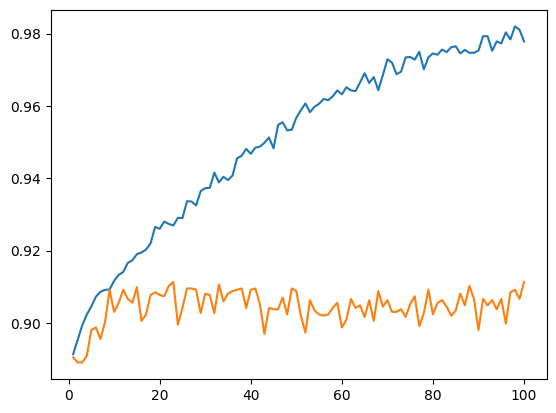

In [81]:
sns.lineplot(x=np.arange(1,101),y=history.history["accuracy"])
sns.lineplot(x=np.arange(1,101),y=history.history["val_accuracy"])